In [58]:
#get market data
import pandas as pd
market_df = pd.read_csv("Stock_Price.csv")[2:]

In [59]:
#get growth rate of daily price
market_df['Adj Close'] = pd.to_numeric(market_df['Adj Close'],errors='coerce')
market_df['Open'] = pd.to_numeric(market_df['Open'],errors='coerce')
market_df['Daily Growth'] = (market_df['Adj Close']-market_df['Open'])/market_df['Open']
market_df.head()

,Attributes,High,Low,Open,Close,Volume,Adj Close,Daily Growth
2,2016-09-26,2158.5400390625,2145.0400390625,2158.540039,2146.10009765625,3216170000,2146.100098,-0.005763
3,2016-09-27,2161.1298828125,2141.550048828125,2146.040039,2159.929931640625,3437770000,2159.929932,0.006472
4,2016-09-28,2172.39990234375,2151.7900390625,2161.850098,2171.3701171875,3891460000,2171.370117,0.004404
5,2016-09-29,2172.669921875,2145.199951171875,2168.899902,2151.1298828125,4249220000,2151.129883,-0.008193
6,2016-09-30,2175.300048828125,2156.510009765625,2156.510010,2168.27001953125,4173340000,2168.270020,0.005453


In [60]:
# Statistical Description of Daily Growth
import pandas as pd
s = market_df['Daily Growth']
s.describe()

count    508.000000
mean       0.000185
std        0.005713
min       -0.038737
25%       -0.001881
50%        0.000442
75%        0.002863
max        0.030733
Name: Daily Growth, dtype: float64

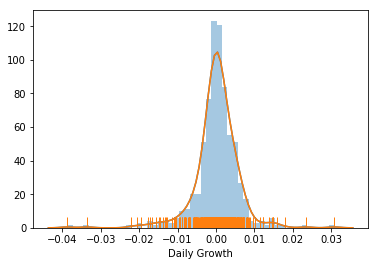

In [61]:
# Statistical Distribution of Daily Growth
import seaborn as sns
sns.distplot(s)
sns.distplot(s,hist=False, rug=True)

((array([-2.99693763e+00, -2.71541584e+00, -2.55714766e+00, -2.44494005e+00,
         -2.35702910e+00, -2.28426461e+00, -2.22189850e+00, -2.16713782e+00,
         -2.11819534e+00, -2.07385576e+00, -2.03325378e+00, -1.99575065e+00,
         -1.96086089e+00, -1.92820660e+00, -1.89748759e+00, -1.86846133e+00,
         -1.84092891e+00, -1.81472515e+00, -1.78971127e+00, -1.76576954e+00,
         -1.74279917e+00, -1.72071318e+00, -1.69943600e+00, -1.67890149e+00,
         -1.65905145e+00, -1.63983438e+00, -1.62120450e+00, -1.60312088e+00,
         -1.58554681e+00, -1.56844922e+00, -1.55179822e+00, -1.53556667e+00,
         -1.51972989e+00, -1.50426535e+00, -1.48915242e+00, -1.47437215e+00,
         -1.45990713e+00, -1.44574128e+00, -1.43185975e+00, -1.41824878e+00,
         -1.40489560e+00, -1.39178833e+00, -1.37891589e+00, -1.36626798e+00,
         -1.35383492e+00, -1.34160769e+00, -1.32957782e+00, -1.31773733e+00,
         -1.30607876e+00, -1.29459507e+00, -1.28327960e+00, -1.27212611e+00,

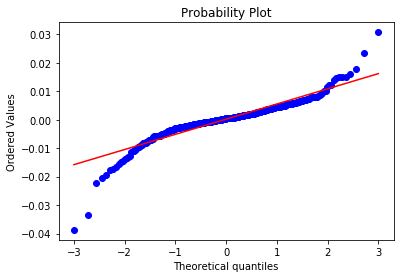

In [64]:
from scipy import stats
import seaborn as sns
stats.probplot(s, plot=sns.mpl.pyplot)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3e11da4550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3e11da4be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3e11da4208>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e11dad2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e11dad940>],
 'means': [<matplotlib.lines.Line2D at 0x7f3e11dad5f8>]}

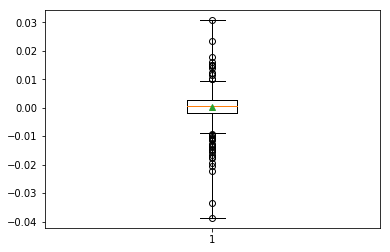

In [76]:
import matplotlib.pyplot as plt
plt.boxplot(s)
plt.show()
plt.boxplot(s, showmeans=True, whis = 99)

In [80]:
import numpy as np
np.percentile(s, )

0.0028634385538593445

<font face="Times New Roman" size=3 color=#000000>
We could find that the distribution of daily growth is approximately symmetric around 0. Therefore we choose 2-sigma to lable y. That is, we lable y as 0 when it is in [0.000185-0.005713, 0.0001850.005713]

In [109]:
# Labeling Y using the interval

LabledY = []

for row in market_df['Daily Growth']:
    if row < -0.005528:
        LabledY.append(-1)
    elif row > 0.005898:
        LabledY.append(1)
    else:
        LabledY.append(0)

market_df['LabledY'] = LabledY
        

In [113]:
market_df.to_csv('LabeledY.csv')